선형회귀 - 예측

In [137]:
# from sklearn import svm,metrics
# from sklearn.neighbors import KNeighborsClassifier # 븐류
# from sklearn.neighbors import KNeighborsRegressor # 회귀- 예측
from sklearn.linear_model import LinearRegression # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import glob, os.path, re

matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [138]:
df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()


In [139]:
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [140]:
ser = pd.Series(perch_weight)

In [141]:
ser.info()

<class 'pandas.core.series.Series'>
RangeIndex: 56 entries, 0 to 55
Series name: None
Non-Null Count  Dtype  
--------------  -----  
56 non-null     float64
dtypes: float64(1)
memory usage: 580.0 bytes


In [142]:
ser.describe()

count      56.000000
mean      382.239286
std       347.617717
min         5.900000
25%       120.000000
50%       207.500000
75%       692.500000
max      1100.000000
dtype: float64

In [143]:
# null, 0 , 피쳐값 분포, 타입 확인
# str 처리는 어떻게 할 지
# -아스키코드 변경
# -원핫인코딩
# - drop 삭제


In [144]:
df.info() # 타입,nan 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   length   56 non-null     float64
 1    height  56 non-null     float64
 2    width   56 non-null     float64
dtypes: float64(3)
memory usage: 1.4 KB


In [145]:
# 선형회귀 - 표준화작업 필요치 않음. 특성추가, 규제 시 표준화 작업필요
df.describe() # 각 피쳐 데이터 분포 확인

,length,height,width
count,56.000000,56.000000,56.000000
mean,27.892857,7.862143,4.745536
std,9.021668,2.878343,1.775006
min,8.400000,2.110000,1.410000
25%,21.825000,5.690000,3.520000
50%,25.300000,6.920000,4.155000
75%,36.625000,10.850000,6.450000
max,44.000000,12.800000,8.140000


In [146]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
     perch_full,perch_weight
)

In [147]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input,train_target)

LinearRegression()

In [148]:
print(lr.score(train_input,train_target))
print(lr.score(test_input, test_target))

0.9341609900058263
0.962679274469187


In [149]:
# 특성 추가 해서 모델에 적용
# 머신러닝 훈련, 변환기
# degree 값을 순차적으로 변경 1-10 하면서 결과값이 가장 괜찮은 걸로 진행
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input) # 특성이 추가됨
test_poly = poly.transform(test_input)


In [150]:
lr = LinearRegression()
lr.fit(train_poly,train_target)


LinearRegression()

In [151]:
print(lr.score(train_poly,train_target))
print(lr.score(test_poly, test_target)) #degree = 5 가 되면 -값이 나옴


0.9894381051872954
0.9809000398607297


In [153]:
# print(lr.score(test_poly, test_target)) #degree = 5 가 되면 -값이 나옴
# 규제 - 릿지규제, 라쏘규제
# 규제 적용하려면, 표준화 작업이 필요
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [159]:
# 릿지 규제
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled,train_target)


Ridge()

In [161]:
ridge.score(train_scaled,train_target)


0.9851250340557693

In [163]:
ridge.score(test_scaled,test_target)

0.9873775137836944

In [164]:
# Ridge(alpha = 규제) 
# 0.001, 0.01, 0.1 , 1, 10 , 100 (이 가운데 가장 좋은 효율을 채택)

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1 , 1, 10 , 100] # 6개

for alpha in alpha_list:
     ridge = Ridge(alpha=alpha)
     ridge.fit(train_scaled,train_target)
     train_score.append(ridge.score(train_scaled,train_target))
     test_score.append(ridge.score(test_scaled,test_target))


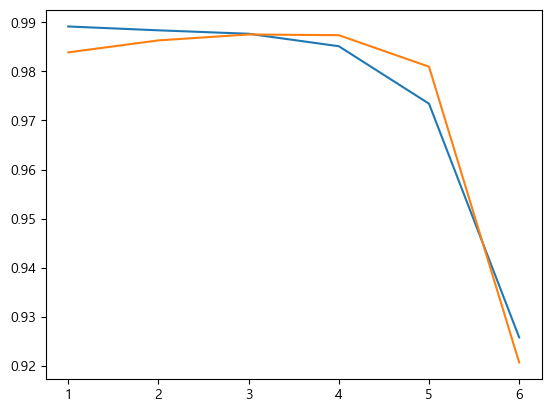

In [169]:
# x = [[1],[2],[3],[4],[5],[6],[7]]
x = np.arange(1,7).reshape(-1,1)
plt.plot(x,train_score)
plt.plot(x,test_score)
plt.show()

In [172]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))


0.9876649062834992
0.9875198241654601


In [ ]:
# 선형회귀
# - 1.모델 구현, 테스트
# - 결과값이 좋지 않다면
# - 2.특성을 추가해서 테스트
# - 3. 특성을 degree 값을 1-10까지 변경해가면서 test
# - train예측률은 높은데, test 예측률이 너무 낮다면
# - 4. 규제를 통해 test 예측률 높이기
# - - 규제 alpha값을 변동을 해서, 예측률이 가장 높은 alpha값 채택, 최종 모델 구현